## *Submitted by* - `Sunita Pradhan`

In [2]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import StandardScaler


In [3]:
#Reading datas
df1  = pd.read_csv('data.csv')
df2 = pd.read_csv('data_2genre.csv')

In [4]:
df1.head(2)

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues


In [5]:
df2.head(2)

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,pop.00024.au,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,61.522054,9.868217,10.097928,8.456293,5.367917,8.377963,3.506944,8.253806,5.883242,-0.101842,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,1
1,pop.00099.au,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,85.941142,33.884536,9.990760,17.699190,0.516018,9.563375,-5.300430,4.168149,8.118337,-7.978898,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,1


In [6]:
#columns in df1 dataframe
df1.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [7]:
#columns in df1 dataframe
df2.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [8]:
data = pd.concat([df1,df2])

In [9]:
#shape of final data
data.shape

(1200, 30)

In [10]:
#Creating a copy of original data
df = data.copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 199
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1200 non-null   object 
 1   tempo               1200 non-null   float64
 2   beats               1200 non-null   int64  
 3   chroma_stft         1200 non-null   float64
 4   rmse                1200 non-null   float64
 5   spectral_centroid   1200 non-null   float64
 6   spectral_bandwidth  1200 non-null   float64
 7   rolloff             1200 non-null   float64
 8   zero_crossing_rate  1200 non-null   float64
 9   mfcc1               1200 non-null   float64
 10  mfcc2               1200 non-null   float64
 11  mfcc3               1200 non-null   float64
 12  mfcc4               1200 non-null   float64
 13  mfcc5               1200 non-null   float64
 14  mfcc6               1200 non-null   float64
 15  mfcc7               1200 non-null   float64
 16  mfcc8       

In [11]:
# Missing value detection
df.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

There were no missing values.

In [12]:
#Checking if there any duplicated value
df.duplicated().sum()

0

There is no duplicate value also.

In [12]:
#Value count of label features
df['label'].value_counts()

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
1            100
2            100
Name: count, dtype: int64

##### By looking at the data we can see that "1" corresponds to "pop" and the "2" corresponds to "classical". Let's change those.

In [13]:
df['label'] = df['label'].replace(to_replace={1: 'pop', 2: 'classical'})

In [16]:
#after changeing values of label feature

df1.label.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

<Axes: ylabel='count'>

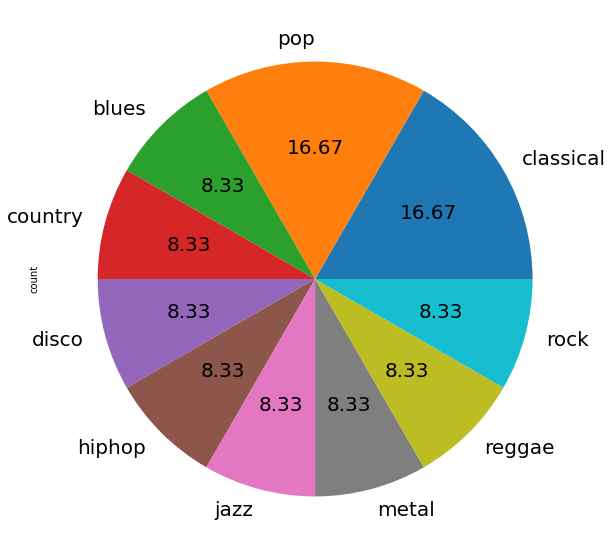

In [14]:
#Plotting a pie plot of label feature

df["label"].value_counts().plot.pie( autopct='%.2f', figsize=(10, 10),fontsize=20)

In [15]:
df.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,119.650771,56.882500,0.370632,0.129331,2203.833135,2246.295208,4571.216473,0.103968,-152.721641,100.395629,...,-5.694288,3.696146,-4.212006,1.364958,-3.308531,0.962490,-3.322924,0.514315,-1.958679,-0.975615
std,28.595204,14.484769,0.084014,0.070874,767.091516,580.235661,1721.201024,0.041925,111.544452,33.575997,...,6.578539,6.660127,6.032812,4.979126,4.870773,4.520644,4.674349,3.836801,3.770014,3.781028
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.304514,0.079168,1548.496850,1815.497242,3172.968313,0.070809,-217.159272,74.875960,...,-10.095268,-0.967632,-8.376523,-2.048828,-6.514669,-2.005988,-6.667356,-2.003979,-4.405887,-3.272533
50%,117.453835,55.000000,0.376657,0.122036,2192.798091,2223.270960,4603.684662,0.099478,-121.409818,98.738478,...,-5.505038,2.979597,-3.621954,1.351666,-3.007097,0.966397,-3.201921,0.665095,-1.902843,-0.985806
75%,135.999178,65.000000,0.432291,0.182267,2753.175473,2664.676118,5679.811488,0.132843,-69.786929,123.917582,...,-0.868188,8.714135,0.388630,4.696107,0.068461,3.994902,-0.089599,3.021267,0.620840,1.381480
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


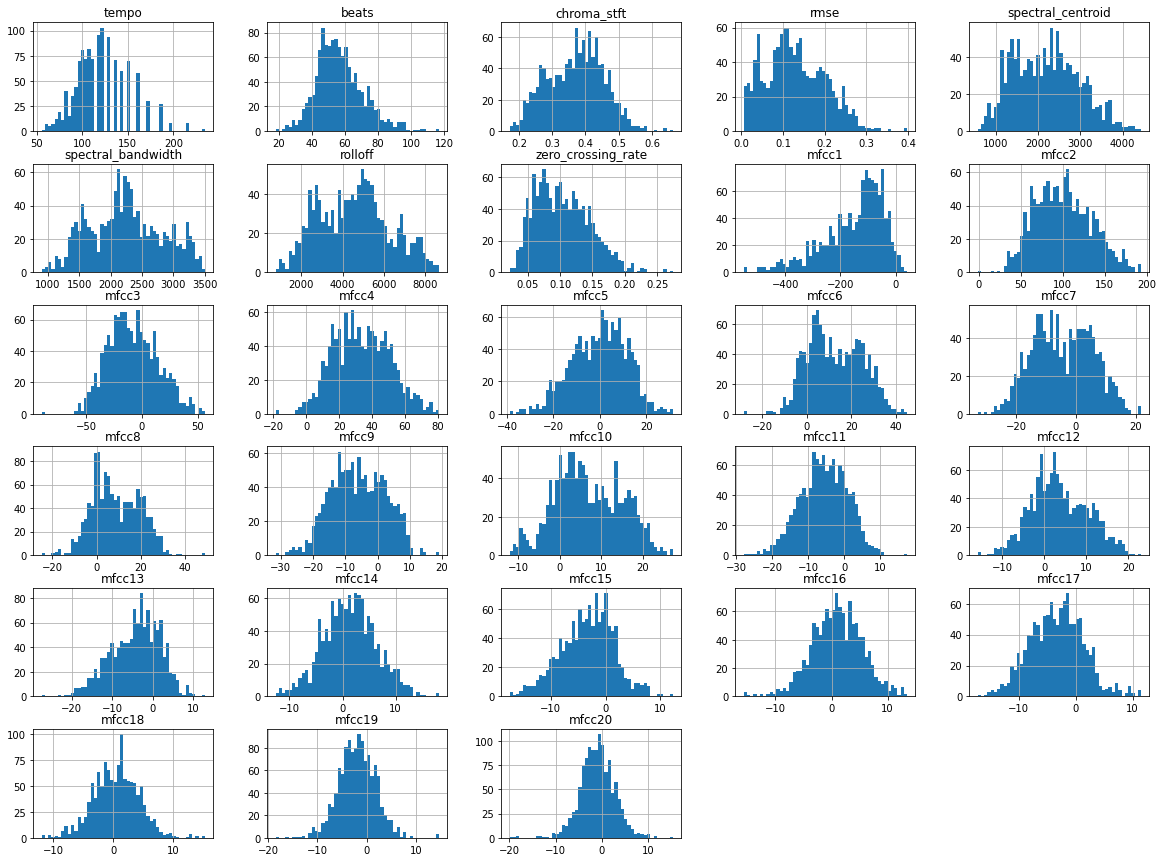

In [16]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [26]:
#Numerical columns of data

numerical_col = df.select_dtypes(["float64","int64"]).columns
numerical_col

Index(['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20'],
      dtype='object')

In [27]:
#Numerical columns of data

categorical_col = df.select_dtypes(["object"]).columns
categorical_col

Index(['filename', 'label'], dtype='object')

In [19]:
features = df.copy()

###### As we can see file name and label feature are related each other. 1st word of file name is indicate the labels. So i Dropped that column. As it has no much use. 

In [23]:
features.drop(['filename'],axis=1,inplace=True)

In [24]:
#After Dropping columnslumns present in data
features.columns

Index(['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'label'],
      dtype='object')

In [33]:
#Converting label fetures into numerical by labelencoding
from sklearn.preprocessing import LabelEncoder

lblEn = LabelEncoder()

features['label'] = lblEn.fit_transform(features['label'])

In [29]:
df.label.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [34]:
features.label.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### KMeans clustering

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\Users\sssun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sssun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sssun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sssun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sssun\anaconda3\lib\site-packages\sklearn\clust

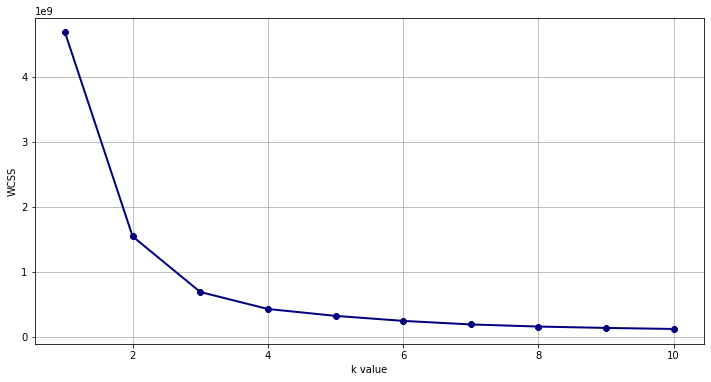

In [36]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='navy', marker='8')
plt.xlabel('k value')
plt.ylabel('WCSS')
plt.show()

In [39]:
# Standardize the location coordinates
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(features)

In [40]:
# Apply K-means clustering algorithm
kmeans = KMeans(n_clusters=4)  
label = kmeans.fit(scaled_feature)
features['cluster_label'] = kmeans.labels_

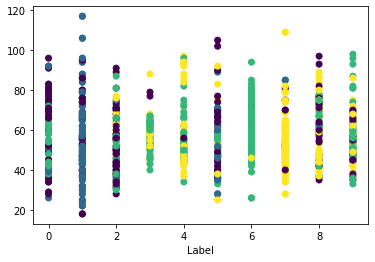

In [44]:
# Map visualization
# Plot clusters on a map
plt.scatter(features['label'],features['beats'], c=features['cluster_label'])
plt.xlabel('Label')
# plt.ylabel('Latitude')
# plt.title('High Booking Areas')
plt.show()

In [46]:
cluster_data = features.copy()
cluster_data['cluster'] = label

In [47]:
print(kmeans.cluster_centers_)

[[ 0.10591781  0.07241894 -0.53059798 -0.29816141 -0.74068751 -0.59553223
  -0.71696452 -0.77058897 -0.33838137  0.63300629 -0.10539312  0.10875879
   0.11523011 -0.10935701 -0.0376643  -0.25619803 -0.29956997 -0.47588081
  -0.10576702 -0.51244949 -0.14792447 -0.65726345 -0.25311557 -0.80288302
  -0.48816148 -0.91437485 -0.32963542 -0.74453736 -0.29528827]
 [ 0.13248132 -0.04475877 -1.31818082 -1.2190823  -1.21856224 -1.30501971
  -1.29450678 -0.83474531 -1.57374006  1.29272684 -0.29668759 -0.47254154
  -0.0892867  -0.81863848 -0.20511828 -0.91555452 -0.03602999 -0.75491945
   0.03053914 -0.6742665   0.43230072 -0.35659958  0.63069045  0.04253613
   0.86400295  0.05686085  0.51068384 -0.00296104 -0.97524022]
 [ 0.00871954  0.07029462  0.58452296  0.12322604  0.13098286 -0.06803133
   0.11402552  0.3284577   0.41311514 -0.13924538 -0.61432921  0.9656583
  -0.94084279  1.10533142 -0.94906472  1.16163748 -0.88001585  1.11533323
  -0.84671906  1.13362185 -0.9621918   0.92619835 -0.89062884

In [48]:
features['Clusters'] = cluster_data.cluster

In [50]:
cluster_data.label.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
print("Shape of scaled features:", scaled_feature.shape)

Shape of scaled features: (1200, 29)


In [53]:
labels = kmeans.labels_
print("Shape of labels:", labels.shape)

Shape of labels: (1200,)


In [54]:
labels = labels.reshape(-1)

In [55]:
labels

array([2, 1, 0, ..., 0, 1, 1])

In [56]:
silhouette_avg = silhouette_score(scaled_feature, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2324541739703186


### Thank you😊